In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [13]:
df2 = pd.read_csv("data_first_run/iraniketab.csv")
df2.head()

,title_persian,title_english,price,discount,grade,code,shabak,page_count,release_year_sh,release_year_mi,...,category,ghate,cover,writer,translator,book_id,writer_id,translator_id,category_id,publisher_id
0,مناظره مسلمان و مسیحی,Muslim and Christian debate,123750,25.0,3.57,16431.0,978-9642247059,268.0,1401.0,NaN,...,"[' نقد ادبی ', ' دینی و مذهبی ', ' ادبیات ایرا...",وزیری,شومیز,['رسول جعفریان'],[],16431,[6039],[],"['295', '346', '437']",[9]
1,طعم سیب زرد,Ta'me sibe zard,49700,30.0,3.41,44551.0,978-6002966469,160.0,1401.0,NaN,...,"[' ادبیات داستانی ', ' ادبیات نوجوان ', ' رمان...",پالتویی,شومیز,['ناصر یوسفی'],[],44551,[14398],[],"['103', '116', '182', '437']",[30]
2,نگاهی نو به فلسفه دین کانت,A new look at Kant's philosophy of religion,150000,25.0,3.63,75051.0,978-6006730820,332.0,1398.0,NaN,...,"[' فلسفی ', ' نقد ادبی ', ' دینی و مذهبی ', ' ...",رقعی,شومیز,['مصطفی صالحی اردکانی'],[],75051,[41157],[],"['291', '295', '346', '437']",[1971]
3,مدیریت خشم,Anger Management,80000,20.0,3.21,32993.0,978-9641703129,128.0,1401.0,2018.0,...,"[' ادبیات آمریکا ', ' ادبیات واقع گرایانه ', '...",رقعی,شومیز,['بیل اندروز'],['شاهین برادران'],32993,[19055],[4242],"['97', '139', '167', '327', '377']",[1195]
4,اطوار اندیشه ی اسلامی,Atvar-e andishe-ye Eslami,120000,20.0,3.21,46770.0,978-9642671649,112.0,1391.0,NaN,...,"[' ادبیات واقع گرایانه ', ' فلسفی ', ' دینی و ...",رقعی,جلدسخت,['محمد خواجوی'],[],46770,[26284],[],"['139', '291', '346', '437']",[1254]


In [9]:
# Remove columns we don't need
df2 = df2[["price", "cover"]]
df2.cover.value_counts()

cover
شومیز               42031
زرکوب                2320
جلدسخت               2129
سلفونی               1236
جلدنرم                 90
طرحچرمباقاببازشو       74
جلدسختهمراهباقاب        1
Name: count, dtype: int64

In [10]:
# Remove rows which are not 'roghei' or 'shomiz'
df2 = df2[df2.cover.isin(["رقعی", "شومیز"])]
df2.head()

,price,cover
0,123750,شومیز
1,49700,شومیز
2,150000,شومیز
3,80000,شومیز
5,129500,شومیز


In [193]:
# create a new column that is 1 if the book has translator and 0 if don't
df1["translated"] = df1["translator"].apply(lambda x: 1 if len(x) > 3 else 0)
df1.head()

,price,translator,translated
0,123750,[],0
1,49700,[],0
2,150000,[],0
3,80000,['شاهین برادران'],1
4,120000,[],0


In [194]:
# Remove 'translator' column which we don't need
df1 = df1[["price", "translated"]]
df1.head()

,price,translated
0,123750,0
1,49700,0
2,150000,0
3,80000,1
4,120000,0


In [195]:
# Remove outliers: top 5% of prices
threshold = df1["price"].quantile(0.95)
df1 = df1[df1["price"] <= threshold]

In [196]:
# Calculate mean and variance for both groups
mean_translated = df1[df1["translated"] == 1]["price"].mean()
variance_translated = df1[df1["translated"] == 1]["price"].var()

mean_non_translated = df1[df1["translated"] == 0]["price"].mean()
variance_non_translated = df1[df1["translated"] == 0]["price"].var()

print(f"Translated books:")
print(f"\tMean of translated books: {mean_translated:,.1}")
print(f"\tVariance of translated books: {variance_translated:,.1}")
print(f"\nNon-translated books:")
print(f"\tMean of non-translated books: {mean_non_translated:,.1}")
print(f"\tVariance of non-translated books: {variance_non_translated:,.1}")

Translated books:
	Mean of translated books: 9e+04
	Variance of translated books: 5e+09

Non-translated books:
	Mean of non-translated books: 7e+04
	Variance of non-translated books: 4e+09


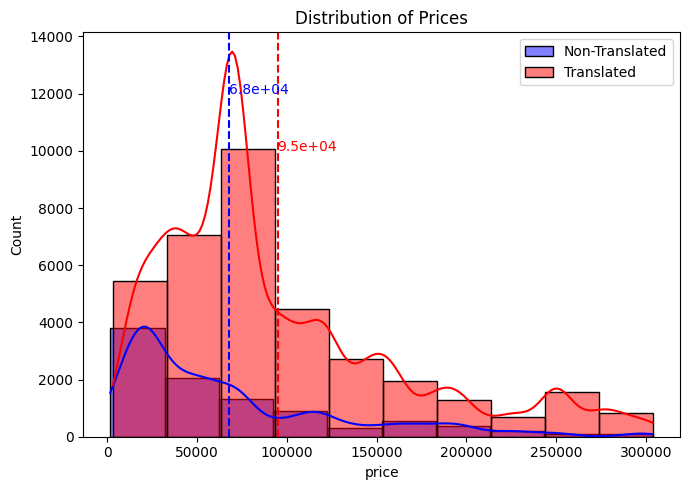

In [197]:
# Distribution histogram plot with mean annotations
plt.figure(figsize=(7, 5))
sns.histplot(
    df1[df1["translated"] == 0]["price"],
    color="blue",
    label="Non-Translated",
    kde=True,
    bins=10,
)
sns.histplot(
    df1[df1["translated"] == 1]["price"],
    color="red",
    label="Translated",
    kde=True,
    bins=10,
)

plt.axvline(mean_non_translated, color="blue", linestyle="--")
plt.text(
    mean_non_translated, 12000, f"{mean_non_translated:,.2}", rotation=0, color="blue"
)

plt.axvline(mean_translated, color="red", linestyle="--")
plt.text(mean_translated, 10000, f"{mean_translated:,.2}", rotation=0, color="red")

plt.title("Distribution of Prices")
plt.legend()
plt.tight_layout()
plt.show()

In [198]:
# Calculate median, IQR and outliers for both groups

# For translated books
median_translated = df1[df1["translated"] == 1]["price"].median()
q1_translated = df1[df1["translated"] == 1]["price"].quantile(0.25)
q3_translated = df1[df1["translated"] == 1]["price"].quantile(0.75)
iqr_translated = q3_translated - q1_translated
lower_bound_translated = q1_translated - 1.5 * iqr_translated
upper_bound_translated = q3_translated + 1.5 * iqr_translated
outliers_translated = df1[
    (df1["translated"] == 1)
    & (
        (df1["price"] < lower_bound_translated)
        | (df1["price"] > upper_bound_translated)
    )
]["price"]

# For non-translated books
median_non_translated = df1[df1["translated"] == 0]["price"].median()
q1_non_translated = df1[df1["translated"] == 0]["price"].quantile(0.25)
q3_non_translated = df1[df1["translated"] == 0]["price"].quantile(0.75)
iqr_non_translated = q3_non_translated - q1_non_translated
lower_bound_non_translated = q1_non_translated - 1.5 * iqr_non_translated
upper_bound_non_translated = q3_non_translated + 1.5 * iqr_non_translated
outliers_non_translated = df1[
    (df1["translated"] == 0)
    & (
        (df1["price"] < lower_bound_non_translated)
        | (df1["price"] > upper_bound_non_translated)
    )
]["price"]

print(f"Translated books:")
print(f"\tMedian of translated books: {median_translated:,.1}")
print(f"\tIQR of translated books: {iqr_translated:,.1}")
print(f"\tOutliers of translated books: {len(outliers_translated.tolist())}")
print(f"\nNon-translated books:")
print(f"\tMedian of non-translated books: {median_non_translated:,.1}")
print(f"\tIQR of non-translated books: {iqr_non_translated:,.1}")
print(f"\tOutliers of non-translated books: {len(outliers_non_translated.tolist())}")

Translated books:
	Median of translated books: 7e+04
	IQR of translated books: 8e+04
	Outliers of translated books: 2505

Non-translated books:
	Median of non-translated books: 4e+04
	IQR of non-translated books: 8e+04
	Outliers of non-translated books: 368


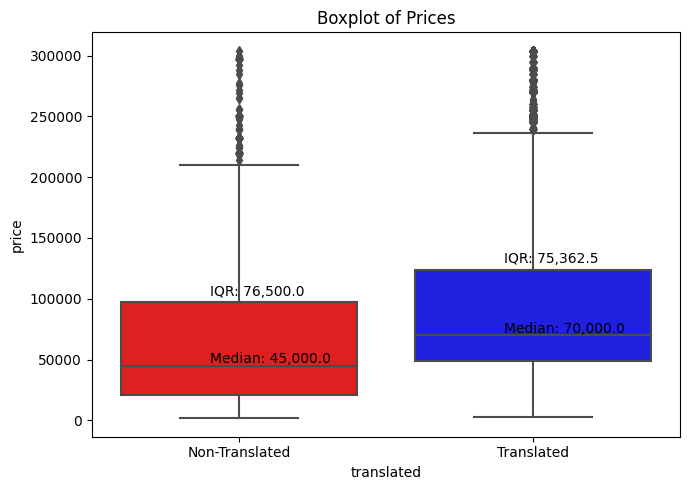

In [199]:
# Boxplot with median and IQR annotations
plt.figure(figsize=(7, 5))
sns.boxplot(x="translated", y="price", data=df1, palette={"blue", "red"})
plt.title("Boxplot of Prices")
plt.xticks([0, 1], ["Non-Translated", "Translated"])

# Annotating median for both groups
plt.text(
    -0.1,
    median_non_translated + 2000,
    f"Median: {median_non_translated:,}",
    rotation=0,
    color="black",
)
plt.text(
    0.9,
    median_translated + 2000,
    f"Median: {median_translated:,}",
    rotation=0,
    color="black",
)

# Annotating IQR for non-translated books
plt.text(
    -0.1,
    q3_non_translated + 5000,
    f"IQR: {iqr_non_translated:,.1f}",
    rotation=0,
    color="black",
)

# IQR for translated books is 0 as there's only one data point
plt.text(
    0.9, q3_translated + 5000, f"IQR: {iqr_translated:,.1f}", rotation=0, color="black"
)

plt.tight_layout()
plt.show()

In [200]:
# Measure skewness for both groups
skewness_non_translated = df1[df1["translated"] == 0]["price"].skew()
skewness_translated = df1[df1["translated"] == 1]["price"].skew()

print(f"Skewness for translated books: {skewness_translated:,.2f}")
print(f"Skewness for non-translated books: {skewness_non_translated:,.2f}")

Skewness for translated books: 1.21
Skewness for non-translated books: 1.43


Both are right-skewed.

In [201]:
# Apply logarithm transformation for both groups
df1["price_log_transformed"] = np.log(df1["price"])

skewness_non_translated = df1[df1["translated"] == 0]["price_log_transformed"].skew()
skewness_translated = df1[df1["translated"] == 1]["price_log_transformed"].skew()

print(
    f"Skewness for translated books after log transform: {skewness_translated:,.2f}"
)
print(
    f"Skewness for non-translated books after log transform: {skewness_non_translated:,.2f}"
)

Skewness for translated books after log transform: -0.48
Skewness for non-translated books after log transform: -0.33


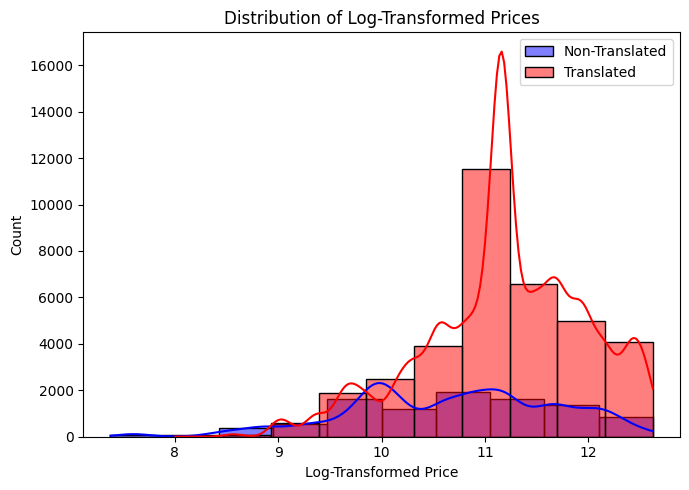

In [202]:
# Plot histogram for log-transformed prices
plt.figure(figsize=(7, 5))
sns.histplot(
    df1[df1["translated"] == 0]["price_log_transformed"],
    color="blue",
    label="Non-Translated",
    kde=True,
    bins=10,
)
sns.histplot(
    df1[df1["translated"] == 1]["price_log_transformed"],
    color="red",
    label="Translated",
    kde=True,
    bins=10,
)

plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log-Transformed Price")
plt.legend()
plt.tight_layout()
plt.show()

In [203]:
# Perform independent two-sample t-test
non_translated_prices = df1[df1["translated"] == 0]["price_log_transformed"]
translated_prices = df1[df1["translated"] == 1]["price_log_transformed"]

t_stat, p_value = ttest_ind(non_translated_prices, translated_prices, equal_var=True)

print(f"T-statistic: {t_stat:,.5f}")
print(f"P-value: {p_value:,.5f}")

T-statistic: -52.88279
P-value: 0.00000


A t-statistic of −51.00611 suggests a statistically significant difference between the means of the two groups, with the mean of the first group being higher than the mean of the second group.
The magnitude of the t-statistic (51.00611) is quite large, which indicates a very strong difference between the groups.

A  p-value of 0.000 indicates that the observed data is extremely inconsistent with the null hypothesis. This leads to the REJECTION of the null hypothesis in favor of the alternative hypothesis.